In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
import pandas as pd
from PIL import Image
import glob
from skimage.color import rgb2gray
from sklearn.decomposition import PCA


In [2]:
my_data = np.genfromtxt('C:/Users/Muhammad Al-Barbary/OneDrive/Desktop/Education/Machine Learning Stanford/Number Recognition/english.csv', delimiter=',')
Y_Train= my_data[1:551,1]
print(Y_Train.shape)

(550,)


In [3]:
image_list = []
gray_images_train =[]
for filename in glob.glob('C:/Users/Muhammad Al-Barbary/OneDrive/Desktop/Education/Machine Learning Stanford/Number Recognition/img/*.png'): #assuming gif
    im=Image.open(filename)
    im=np.array(im)
    gray_images_train.append(rgb2gray(im))
    image_list.append(rgb2gray(im).flatten())
X_Train=np.asarray(image_list)
gray_images_train=np.asarray(gray_images_train)
print(X_Train.shape)


(550, 1080000)


In [15]:
PCA_Model=PCA(n_components=108)
X_Train_PCA=PCA_Model.fit_transform(X_Train)
# X_Train_Recovered = PCA_Model.inverse_transform(X_Train_PCA)

In [117]:
print(X_Train_PCA.shape)
# print(X_Train_Recovered.shape)

(550, 108)


In [18]:
Y_Train_Final=[]
for i in range (550):
    vector= np.zeros(10)
    vector[int(Y_Train[i])]=1
    Y_Train_Final.append(vector)
Y_Train=Y_Train_Final
Y_Train=np.asarray(Y_Train)
print(Y_Train.shape)


(550, 10)


In [41]:
model = Sequential (
    [
    tf.keras.Input(shape=(108,)),
    Dense(25,activation='relu',name='layer1'),
    Dense(15,activation='relu',name='layer2'),
    Dense(10,activation='softmax',name='layer3'),
    ],
    name='my_model'
)

In [63]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

In [64]:
model.fit(X_Train_PCA,Y_Train,epochs=2000)

Epoch 1/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 2/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 3/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.1576
Epoch 4/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 5/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.1564
Epoch 6/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.1560
Epoch 7/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1556
Epoch 8/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1543
Epoch 9/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1539
Epoch 10/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.1535
Epoch 11/2000
18/18 [==============================] - 0s 2ms/step - loss: 0.1528
Epoch 12/2000
18/18 [==============================] - 0s 1ms/step - loss: 0.1524
Epoch 13/2000
18/18 [====

In [65]:
PredictionArray=np.zeros(550)
for i in range (550):
    print(i)
    prediction=model.predict(X_Train_PCA[i].reshape(1,108))
    maximum=0
    index=0
    for j in range (10):
        if (prediction[0][j]>maximum):
            maximum=prediction[0][j]
            index=j
    PredictionArray[i]= index

0
1/1 [==============================] - 0s 59ms/step
1
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 19ms/step
4
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 22ms/step
6
1/1 [==============================] - 0s 22ms/step
7
1/1 [==============================] - 0s 22ms/step
8
1/1 [==============================] - 0s 18ms/step
9
1/1 [==============================] - 0s 21ms/step
10
1/1 [==============================] - 0s 20ms/step
11
1/1 [==============================] - 0s 23ms/step
12
1/1 [==============================] - 0s 22ms/step
13
1/1 [==============================] - 0s 21ms/step
14
1/1 [==============================] - 0s 21ms/step
15
1/1 [==============================] - 0s 20ms/step
16
1/1 [==============================] - 0s 18ms/step
17
1/1 [==============================] - 0s 23ms/step
18
1/1 [============

In [68]:
error=0
for i in range(10):
    error+= abs(55-np.count_nonzero(PredictionArray == i))
print("accuracy= ", 100-error*100/550)   

accuracy=  98.9090909090909


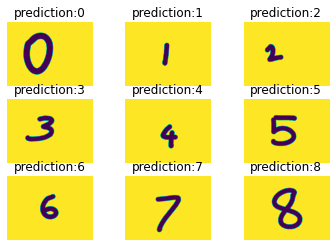

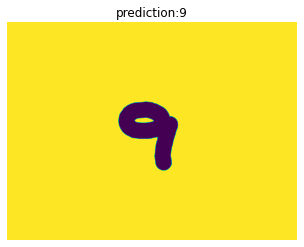

In [116]:
fig,ax=plt.subplots(3,3)
# print("prediction is",str(int(PredictionArray[0])))
ax[0][0].imshow(gray_images_train[0]);
ax[0][0].set_title(f"prediction:{int(PredictionArray[0])}");
ax[0][0].axis("off");
ax[0][1].imshow(gray_images_train[60]);
ax[0][1].set_title(f"prediction:{int(PredictionArray[60])}");
ax[0][1].axis("off");
ax[0][2].imshow(gray_images_train[120]);
ax[0][2].set_title(f"prediction:{int(PredictionArray[120])}");
ax[0][2].axis("off");
ax[1][0].imshow(gray_images_train[180]);
ax[1][0].set_title(f"prediction:{int(PredictionArray[180])}");
ax[1][0].axis("off");
ax[1][1].imshow(gray_images_train[240]);
ax[1][1].set_title(f"prediction:{int(PredictionArray[240])}");
ax[1][1].axis("off");
ax[1][2].imshow(gray_images_train[300]);
ax[1][2].set_title(f"prediction:{int(PredictionArray[300])}");
ax[1][2].axis("off");
ax[2][0].imshow(gray_images_train[360]);
ax[2][0].set_title(f"prediction:{int(PredictionArray[360])}");
ax[2][0].axis("off");
ax[2][1].imshow(gray_images_train[420]);
ax[2][1].set_title(f"prediction:{int(PredictionArray[420])}");
ax[2][1].axis("off");
ax[2][2].imshow(gray_images_train[480]);
ax[2][2].set_title(f"prediction:{int(PredictionArray[480])}");
ax[2][2].axis("off");
fig,ax=plt.subplots(1,1)
ax.imshow(gray_images_train[540]);
ax.set_title(f"prediction:{int(PredictionArray[540])}");
ax.axis("off");